In [1]:
import ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
import math

In [2]:
#prepare data
da = pd.read_csv("train.csv")
da.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
da.shape

(8693, 14)

DATA ChECK AND PREPARATION

In [4]:
def check_str(column):
    summary = [0 for i in range (len(da[column]))]
    for i in range(len(da[column])):
        if isinstance(da[column][i],float):
            summary[i] += 1
    total = np.where(pd.Series(summary) > 0,1,0)
    print("in "+column + " total errors: "+ str(np.count_nonzero(total)))
    return total

In [5]:
import math

def check_float(column):
    summary = [0 for i in range (len(da[column]))]
    for i in range(len(da[column])):
        if math.isnan(da[column][i]):
            summary[i] += 1
    total = pd.Series(np.where(pd.Series(summary) > 0,1,0))
    print("in "+column + " total errors: "+ str(np.count_nonzero(total)))
    return total

In [6]:
col_str = ['PassengerId','VIP','Transported','HomePlanet', 'CryoSleep', 'Cabin', 'Destination','Name']
col_float = ['RoomService', 'FoodCourt', 'Age','ShoppingMall', 'Spa', 'VRDeck']

total = pd.Series([0 for i in range (len(da["Age"]))])
for col in col_str:
    total += check_str(col)
for col in col_float:
    total += check_float(col)

np.count_nonzero(total)

in PassengerId total errors: 0
in VIP total errors: 203
in Transported total errors: 0
in HomePlanet total errors: 201
in CryoSleep total errors: 217
in Cabin total errors: 199
in Destination total errors: 182
in Name total errors: 200
in RoomService total errors: 181
in FoodCourt total errors: 183
in Age total errors: 179
in ShoppingMall total errors: 208
in Spa total errors: 183
in VRDeck total errors: 188


2087

In [7]:
def conv(x):
    if(isinstance(x,float)):
        return -1.0
    elif x:
        return 1.0
    else:
        return 0.0

da["VIP"] = pd.Series([conv(vip) for vip in da["VIP"]])
da["CryoSleep"] = pd.Series([conv(sleep) for sleep in da["CryoSleep"]])


In [8]:
def conv_str(x):
    if(isinstance(x,float)):
        return '-'
    else:
        return x

da["HomePlanet"] = pd.Series([conv_str(homeplanet) for homeplanet in da["HomePlanet"]])
da["Destination"] = pd.Series([conv_str(destination) for destination in da["Destination"]])


In [9]:
def conv_float(x):
    if(math.isnan(x)):
        return -1.0
    else:
        return x

for float_column in col_float:
    da[float_column] = pd.Series([conv_float(x) for x in da[float_column]])

In [10]:
def func(txt):
    if isinstance(txt,float):
        return ['-','-']
    else:
        return txt.split(" ")
name_surname = [func(txt) for txt in da["Name"]]
for i in range(len(name_surname)):
    if len(name_surname[i]) !=2:
        print(name_surname[i])
da["First name"] = pd.DataFrame(name_surname)[0]
da["Last name"] = pd.DataFrame(name_surname)[1]

In [11]:
#Lets split Cabin description into separate parts: deck/num/side
#split
def cabin_split(txt):
    if isinstance(txt,float):
        return ['-','-1','-']
    else:
        return txt.split("/")
cabin_array = pd.DataFrame([cabin_split(cabin) for cabin in da["Cabin"]])

Deck = {'A':1.0, 'B':2.0, 'C':3.0, 'D':4.0, 'E':5.0, 'F':6.0, 'G':7.0, 'T':8.0, '-':-1.0}
Side = {'P':1.0, 'S':2.0, '-': -1.0}
cabin_array[0] = pd.Series([Deck[x] for x in cabin_array[0]])
da["Deck"] = cabin_array[0]
cabin_array[1] = pd.Series([float(x) for x in cabin_array[1]])
da["Num"] = cabin_array[1]
cabin_array[2] = pd.Series([Side[x] for x in cabin_array[2]])
da["Side"] = cabin_array[2]

In [12]:
pas_id = pd.DataFrame([txt.split("_") for txt in da["PassengerId"]])
for i in range(len(pas_id.iloc[:,0])):
    pas_id.iloc[i,0] = float(pas_id.iloc[i,0])
for i in range(len(pas_id.iloc[:,1])):
    pas_id.iloc[i,1] = float(pas_id.iloc[i,1])

da["id1"] = pas_id[0]
da["id2"] = pas_id[1]

In [13]:
da["Transported"] = np.where(da["Transported"]==True, 1.0, -1.0)

In [14]:
da.drop("Name", axis = 1, inplace = True)
da.drop("Cabin", axis = 1, inplace = True)
da.drop("PassengerId", axis = 1, inplace = True)
print(da.shape)
da.head()

(8693, 18)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,First name,Last name,Deck,Num,Side,id1,id2
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,Maham,Ofracculy,2.0,0.0,1.0,1.0,1.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,Juanna,Vines,6.0,0.0,2.0,2.0,1.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,Altark,Susent,1.0,0.0,2.0,3.0,1.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,Solam,Susent,1.0,0.0,2.0,3.0,2.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,Willy,Santantines,6.0,1.0,2.0,4.0,1.0


In [15]:
col_str = ['Transported','HomePlanet', 'Destination','First name','Last name']
col_float = ['Deck','Num','Side','CryoSleep','VIP', 'Age','RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck','id1','id2']

total = pd.Series([0 for i in range (len(da["Age"]))])
for col in col_str:
    total += check_str(col)
for col in col_float:
    total += check_float(col)

total.sum()

in Transported total errors: 8693
in HomePlanet total errors: 0
in Destination total errors: 0
in First name total errors: 0
in Last name total errors: 0
in Deck total errors: 0
in Num total errors: 0
in Side total errors: 0
in CryoSleep total errors: 0
in VIP total errors: 0
in Age total errors: 0
in RoomService total errors: 0
in FoodCourt total errors: 0
in ShoppingMall total errors: 0
in Spa total errors: 0
in VRDeck total errors: 0
in id1 total errors: 0
in id2 total errors: 0


8693

In [16]:
def new_undefined_str_count(dx,column):
    sum_ = [0 for _ in dx.index]
    for i in range(len(dx[column])):
        if dx.loc[dx.index[i],column] == '-':
            sum_[i] += 1
    sum_ = pd.Series(sum_)
    print(column + ": total undefined values: "+str(sum_.sum()))
    return sum_

def new_undefined_float_count(dx,column):
    sum_ = [0 for a in dx.index]
    for i in range(len(dx[column])):
        if dx.loc[dx.index[i],column] == -1.0:
            sum_[i] += 1
    sum_ = pd.Series(sum_)
    print(column + ": total undefined values: "+str(sum_.sum()))
    return sum_

def count_undef(dx):
    sum_ = pd.Series([0 for _ in dx.index])
    
    for i in range(len(dx.columns)):
        if dx.columns[i]=="Transported":
            continue
        if isinstance(dx.iloc[0,i],float):
            sum_+=new_undefined_float_count(dx,dx.columns[i])
        else:
            sum_ +=new_undefined_str_count(dx,dx.columns[i])
    print("Total not fully defined records: " + str((sum_>0).sum()))

NOW LET'S FILL THE MISSING DATA IN THE TABLE

In [17]:
df = da

Now let's fill some of the missing data in some columns with

In [18]:
#HomePlanet
surnames = df["Last name"].unique()
len(surnames)

2218

Let's assume one family is represented by one surname , i.e. they are oiginally from one planet

In [19]:
#checking hypothesis
count = 0
for surname in surnames:
    planets=df[df["Last name"] == surname]["HomePlanet"].unique()
    planets = np.delete(planets,np.where(planets == '-'))
    if len(planets) == 1:
        count +=1
percent = 100*count/len(surnames)
print(f"surnames that are originally from single planet percentage : {percent:.2f}%")


surnames that are originally from single planet percentage : 99.59%


In [20]:
surname_from_single_planet = dict()
surname_unknown_origin = []
surname_many_planets = []
many_planets_candidates = []

for surname in surnames:
    family = df[df["Last name"] == surname]
    homeplanets = family["HomePlanet"].unique()
    homeplanets = np.delete(homeplanets,np.where(homeplanets == '-'))
    if len(homeplanets) <= 1:
        if len(homeplanets) ==0:
            surname_unknown_origin.append(surname)
        else:
            surname_from_single_planet[surname] = homeplanets[0] #single choice

    else: #many choices
        surname_many_planets.append(surname)
        many_planets_candidates = homeplanets

percent = 100*len(surname_from_single_planet)/len(surnames)
print(f"surnames that are originally from single planet percentage : {percent:.2f}%")
print(f"surnames that unknown origin # : {len(surname_unknown_origin):d}")
print(f"surnames that originally from many planets # : {len(surname_many_planets):d}")

surnames that are originally from single planet percentage : 99.59%
surnames that unknown origin # : 8
surnames that originally from many planets # : 1


In [21]:
import random # for choosing planets randomly

planets_col = np.array(df["HomePlanet"])
cleaned = np.delete(planets_col,np.where(planets_col == '-'))
planets = np.unique(cleaned)

total_num = len(cleaned)

def planet_prob(planet):
    return np.count_nonzero(cleaned == planet)/total_num

probabilities = [planet_prob(planet) for planet in planets]

planets_prob_dict = {planet: probability for planet, probability in zip(planets,probabilities)}

def get_planet_with_prob(planet_list, random_state = 1):
    probs = pd.Series([planets_prob_dict[planet] for planet in planet_list])
    total = probs.sum()
    probs = [prob/total for prob in probs]
    return random.choices(planet_list, weights=probs, k=1)[0]

In [22]:
planet_random_state = 2

for i in range(len(df["HomePlanet"])):
    if df["HomePlanet"][i] == '-':
        if df["Last name"][i] in surname_from_single_planet:
            df["HomePlanet"][i] = surname_from_single_planet[df["Last name"][i]]
        elif df["Last name"][i] in surname_unknown_origin: #all planets possible
            df["HomePlanet"][i] = get_planet_with_prob(['Earth','Europa','Mars'],random_state = planet_random_state)
            #print("for surname with unknown origin " + df["Last name"][i]+" set planet "+df["HomePlanet"][i])
        else: #many planets - we randomy choose only between the existing planets excluding the missin ones
            list_ = df[df["Last name"]==df["Last name"][i]]["HomePlanet"].unique()
            list_ = np.delete(list_,np.where(list_== '-'))
            df["HomePlanet"][i]  = get_planet_with_prob(list_,random_state=planet_random_state)
            #print("for surname with many origins (below)" + df["Last name"][i]+" set planet "+df["HomePlanet"][i])

(df[df["HomePlanet"] == '-'])["HomePlanet"].count()

C:\Users\Папа\AppData\Local\Temp\ipykernel_2540\2598399304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HomePlanet"][i] = get_planet_with_prob(['Earth','Europa','Mars'],random_state = planet_random_state)
C:\Users\Папа\AppData\Local\Temp\ipykernel_2540\2598399304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HomePlanet"][i] = surname_from_single_planet[df["Last name"][i]]
C:\Users\Папа\AppData\Local\Temp\ipykernel_2540\2598399304.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

0

In [23]:
dt = df[df["CryoSleep"]==1]
expense = dt['RoomService']+dt['FoodCourt']+dt['ShoppingMall']+dt['Spa']+dt['VRDeck']
(expense >0).sum()

0

Bingo!

In [24]:
df.loc[df["CryoSleep"]==1,'RoomService'] = 0
df.loc[df["CryoSleep"]==1,'FoodCourt'] = 0
df.loc[df["CryoSleep"]==1,'ShoppingMall'] = 0
df.loc[df["CryoSleep"]==1,'Spa'] = 0
df.loc[df["CryoSleep"]==1,'VRDeck'] = 0

if expenses >0 then df.loc[df["CryoSleep"]==-1,'CryoSleep'] = 0

In [25]:
expense = df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']
df.loc[(expense > 0)&(df["CryoSleep"]==-1.0),"CryoSleep"] = 0

In [26]:
origin_map = {'Earth':0.0, 'Mars':1.0, 'Europa':2.0}
destination_map = {'55 Cancri e':0.0,'TRAPPIST-1e':1.0,'PSO J318.5-22':2.0}

def route_number(origin,destination):
    if (origin == '-') or (destination == '-'): 
        return -1.0
    else: 
        o = origin_map[origin]
        d = destination_map[destination]
        return o*3+d+1 #range(1,10)

df['route'] = pd.Series([route_number(df["HomePlanet"][i],df["Destination"][i]) for i in range(len(df["HomePlanet"]))])
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,First name,Last name,Deck,Num,Side,id1,id2,route
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,Maham,Ofracculy,2.0,0.0,1.0,1.0,1.0,8.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,Juanna,Vines,6.0,0.0,2.0,2.0,1.0,2.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,Altark,Susent,1.0,0.0,2.0,3.0,1.0,8.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,Solam,Susent,1.0,0.0,2.0,3.0,2.0,8.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,Willy,Santantines,6.0,1.0,2.0,4.0,1.0,2.0


ID2 --> Deck

In [27]:
dt = df[df["Deck"]!=-1.0]
deck = dt["Deck"].values
id2 = dt["id2"].values
arr = pd.Series(zip(id2,deck))
uniq_deck_id2 = arr.unique()
print("unique pairs #:",len(uniq_deck_id2))

def count_pairs(arr,pair):
    c = 0
    for p in arr:
        c+= p==pair
    return c
c = pd.Series([count_pairs(arr,uni) for uni in uniq_deck_id2])
uniq_deck_id2 = pd.Series(uniq_deck_id2)

unique pairs #: 51


LET'S make probability matrix

In [28]:
df["id2"].unique()

array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype=object)

In [29]:
prob_matrix_deck = pd.DataFrame(index=dt["id2"].unique(),columns = dt["Deck"].unique())
unique_index = pd.Index(list(uniq_deck_id2))

for uni in uniq_deck_id2:
    prob_matrix_deck.loc[uni[0],uni[1]] = c[unique_index.get_loc((uni[0],uni[1]))]

prob_matrix_deck

,2.0,6.0,1.0,7.0,5.0,4.0,3.0,8.0
1.0,438,2202,147,1857,671,331,432,5
2.0,212,368,64,337,128,97,171,NaN
3.0,69,136,30,182,43,22,69,NaN
4.0,37,40,11,70,18,12,37,NaN
5.0,14,23,3,43,12,9,23,NaN
6.0,5,12,1,38,3,4,12,NaN
7.0,4,9,NaN,23,1,3,3,NaN
8.0,NaN,4,NaN,9,NaN,NaN,NaN,NaN


In [30]:
for i in prob_matrix_deck.index:
    for j in prob_matrix_deck.columns:
        if math.isnan(prob_matrix_deck.loc[i,j]):
            prob_matrix_deck.loc[i,j] = 0

prob_matrix_deck

,2.0,6.0,1.0,7.0,5.0,4.0,3.0,8.0
1.0,438,2202,147,1857,671,331,432,5
2.0,212,368,64,337,128,97,171,0
3.0,69,136,30,182,43,22,69,0
4.0,37,40,11,70,18,12,37,0
5.0,14,23,3,43,12,9,23,0
6.0,5,12,1,38,3,4,12,0
7.0,4,9,0,23,1,3,3,0
8.0,0,4,0,9,0,0,0,0


In [31]:
#finally lets make it probailities
sum_ = 0.0
for i in prob_matrix_deck.index:
    for j in prob_matrix_deck.columns:
        sum_ += prob_matrix_deck.loc[i,j]

for i in prob_matrix_deck.index:
    sum_ = prob_matrix_deck.loc[i,:].sum()
    for j in prob_matrix_deck.columns:
            prob_matrix_deck.loc[i,j] /= sum_

prob_matrix_deck

,2.0,6.0,1.0,7.0,5.0,4.0,3.0,8.0
1.0,0.072004,0.361992,0.024166,0.305277,0.110307,0.054414,0.071018,0.000822
2.0,0.153958,0.267248,0.046478,0.244735,0.092956,0.070443,0.124183,0.0
3.0,0.125227,0.246824,0.054446,0.330309,0.07804,0.039927,0.125227,0.0
4.0,0.164444,0.177778,0.048889,0.311111,0.08,0.053333,0.164444,0.0
5.0,0.110236,0.181102,0.023622,0.338583,0.094488,0.070866,0.181102,0.0
6.0,0.066667,0.16,0.013333,0.506667,0.04,0.053333,0.16,0.0
7.0,0.093023,0.209302,0.0,0.534884,0.023256,0.069767,0.069767,0.0
8.0,0.0,0.307692,0.0,0.692308,0.0,0.0,0.0,0.0


In [32]:
def get_deck_with_prob(id2,random_state_deck = 1):
    probs = np.array(prob_matrix_deck.loc[id2,:])
    return random.choices(prob_matrix_deck.columns, weights=probs, k=1)[0]

In [33]:
len(df["id1"].unique())

6217

In [34]:
len(df["Num"].unique())

1818

In [35]:
def tuple_equal_2d(tuple1,tuple2):
    return (tuple1[0]==tuple2[0]) and (tuple1[1] == tuple2[1])

def unique_tuple(array_of_tuples):
    array_uniques = []
    for i in range(len(array_of_tuples)):
        j = 0
        while j < i:
            if tuple_equal_2d(array_of_tuples[i], array_of_tuples[j]):
                break
            else:
                j +=1
        if j == i:
            array_uniques.append(array_of_tuples[i])
    print(len(array_uniques))
    return array_uniques

In [36]:
dt = df[df["Num"]!=-1.0]
num = dt["Num"].values
id1 = dt["id1"].values
arr = pd.Series(zip(id1,num))
uniq_num_id1 = pd.Series(arr.unique())
print(len(uniq_num_id1))

single_id1_to_num = []
id1_to_many_num = []
id1_many = []
num_many = []
for pair in uniq_num_id1:
    if len(dt[dt["id1"] == pair[0]]["Num"].unique())== 1:
        single_id1_to_num.append(pair)
    else:
        id1_to_many_num.append(pair)
        id1_many.append(pair[0])
        num_many.append(pair[1])

id1_many = pd.Series(id1_many)
num_many = pd.Series(num_many)

single_id1_to_num_dict = {id1:num for id1,num in single_id1_to_num}

def count_pairs(arr,pair):
    c = 0
    for p in arr:
        c+= p==pair
    return c
c_ = pd.Series([count_pairs(arr,uni) for uni in id1_to_many_num])

print("singles: ",len(single_id1_to_num))
print("#pairs for matrix: ",len(id1_to_many_num))

6559
singles:  5698
#pairs for matrix:  861


In [37]:
prob_matrix_num = pd.DataFrame(index=list(id1_many.unique()),columns = list(num_many.unique()))
print(prob_matrix_num.shape)
unique_index = pd.Index(list(id1_to_many_num))

for uni in id1_to_many_num:
    prob_matrix_num.loc[uni[0],uni[1]] = c_[unique_index.get_loc((uni[0],uni[1]))]

prob_matrix_num.head()

(420, 680)


,2.0,0.0,6.0,14.0,3.0,10.0,15.0,16.0,20.0,19.0,...,291.0,1871.0,1782.0,1487.0,1496.0,1886.0,1888.0,592.0,1507.0,1894.0
6.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17.0,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64.0,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67.0,NaN,NaN,NaN,NaN,NaN,2,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
for i in prob_matrix_num.index:
    for j in prob_matrix_num.columns:
        if math.isnan(prob_matrix_num.loc[i,j]):
            prob_matrix_num.loc[i,j] = 0

prob_matrix_num.head()

,2.0,0.0,6.0,14.0,3.0,10.0,15.0,16.0,20.0,19.0,...,291.0,1871.0,1782.0,1487.0,1496.0,1886.0,1888.0,592.0,1507.0,1894.0
6.0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17.0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64.0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67.0,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91.0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
for i in prob_matrix_num.index:
    sum_ = prob_matrix_num.loc[i,:].sum()
    for j in prob_matrix_num.columns:
            prob_matrix_num.loc[i,j] /= sum_

prob_matrix_num.head()

,2.0,0.0,6.0,14.0,3.0,10.0,15.0,16.0,20.0,19.0,...,291.0,1871.0,1782.0,1487.0,1496.0,1886.0,1888.0,592.0,1507.0,1894.0
6.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
def get_num_with_prob(id1,random_state_num = 1):
    if id1 in list(id1_many.unique()):
        probs = prob_matrix_num.loc[id1,:]
        return random.choices(prob_matrix_num.columns, weights=probs, k=1)[0]
    elif id1 in list(single_id1_to_num_dict.keys()):
        return single_id1_to_num_dict[id1]
    else:
        return -1.0


Now let's map Deck & Num

In [41]:
random_state_deck = 1
random_state_num = 1

for i in range(len(df["Deck"])):
    if(df["Deck"][i]==-1.0):
        df.loc[i,"Deck"] = get_deck_with_prob(df["id2"][i],random_state_deck)

for i in range(len(df["Num"])):
    if(df["Num"][i]==-1.0):
        df.loc[i,"Num"] = get_num_with_prob(df["id1"][i],random_state_num)

Let's see VIP:

In [42]:
count = 0
unknown = 0
mix = 0
vip_surnames = []
no_vip_surnames = []
mix_surnames = []

for surname in surnames:
    matrix = df[df["Last name"] == surname]
    t=matrix["VIP"].unique()
    t = np.delete(t,np.where(t == -1))
    if len(t) == 1:
        count +=1
        if(t[0]==1):
            vip_surnames.append(surname)
        else:
            no_vip_surnames.append(surname)
    elif len(t) == 0:
        unknown +=1
    else:
        mix +=1
        mix_surnames.append(surname)

percent = 100*count/len(surnames)
print(f"surnames that VIP/non VIP together : {percent:.2f}%")
percent = 100*unknown/len(surnames)
print(f"surnames that have totally unknown VIP status : {percent:.2f}%")
percent = 100*mix/len(surnames)
print(f"surnames that have mix VIP status : {percent:.2f}%")

surnames that VIP/non VIP together : 92.06%
surnames that have totally unknown VIP status : 0.32%
surnames that have mix VIP status : 7.62%


In [43]:
pd.crosstab(df["VIP"],df["Deck"])

Deck,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
VIP,,,,,,,,
-1.0,6,13,20,9,15,72,68,0
0.0,223,745,707,447,872,2748,2544,5
1.0,35,42,41,31,15,32,3,0


In [44]:
for i in range(len(df["VIP"])):
    if df["VIP"][i] == -1:
        if df["Last name"][i] in vip_surnames:
            df["VIP"][i] = 1
        elif df["Last name"][i] in no_vip_surnames:
            df["VIP"][i] = 0
        elif df['Deck'][i] > 5:
            df["VIP"][i] = 0
        else:
            df["VIP"][i] = -1

C:\Users\Папа\AppData\Local\Temp\ipykernel_2540\1199576515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VIP"][i] = 0
C:\Users\Папа\AppData\Local\Temp\ipykernel_2540\1199576515.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VIP"][i] = -1
C:\Users\Папа\AppData\Local\Temp\ipykernel_2540\1199576515.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VIP"][i] = 0


In [45]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,First name,Last name,Deck,Num,Side,id1,id2,route
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,Maham,Ofracculy,2.0,0.0,1.0,1.0,1.0,8.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,Juanna,Vines,6.0,0.0,2.0,2.0,1.0,2.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,Altark,Susent,1.0,0.0,2.0,3.0,1.0,8.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,Solam,Susent,1.0,0.0,2.0,3.0,2.0,8.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,Willy,Santantines,6.0,1.0,2.0,4.0,1.0,2.0


<AxesSubplot:xlabel='route', ylabel='count'>

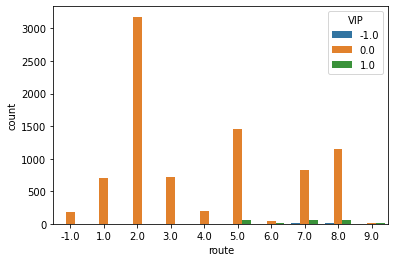

In [46]:
sb.countplot(x = df["route"], hue = df["VIP"])

#VIP ==1 ==> route in [5,6,7,8,9] 

In [47]:
pd.crosstab(df["Deck"],df["route"])

route,-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Deck,,,,,,,,,,
1.0,4,0,4,0,1,0,0,108,145,2
2.0,18,1,6,1,0,3,0,340,428,3
3.0,12,2,3,1,0,6,1,320,410,13
4.0,10,0,5,0,47,213,17,69,126,0
5.0,24,50,325,31,21,303,13,49,86,0
6.0,69,277,1134,229,128,983,20,5,6,1
7.0,45,370,1704,463,0,9,1,12,11,0
8.0,0,0,0,0,0,0,0,0,5,0


In [48]:
prob_matrix_deck_to_route_vip_0 = pd.DataFrame(index = range(1,9), columns = range(1,10))
prob_matrix_deck_to_route_vip_1 = pd.DataFrame(index = range(1,8), columns = range(5,10))

for i in range(1,9):
    dt = df[(df["Deck"] ==i)&(df["VIP"] ==0)]
    counts = [len(dt[dt['route']==j]['route']) for j in range(1,10)]
    Sum = sum(counts)
    if Sum >0:
        probs = [counts[k]/Sum for k in range(9)]
        prob_matrix_deck_to_route_vip_0.loc[i,:] = probs
    else:
        prob_matrix_deck_to_route_vip_1.loc[i,:] = 0

for i in range(1,8):
    dt = df[(df["Deck"] ==i)&(df["VIP"] ==1)]
    counts = [len(dt[dt['route']==j]['route']) for j in range(5,10)]
    Sum = sum(counts)
    if Sum >0:
        probs = [counts[k]/Sum for k in range(5)]
        prob_matrix_deck_to_route_vip_1.loc[i,:] = probs
    else:
        prob_matrix_deck_to_route_vip_1.loc[i,:] = 0



In [49]:
prob_matrix_deck_to_route_vip_0

,1,2,3,4,5,6,7,8,9
1,0.0,0.017937,0.0,0.004484,0.0,0.0,0.412556,0.560538,0.004484
2,0.001355,0.00813,0.001355,0.0,0.004065,0.0,0.425474,0.558266,0.001355
3,0.002813,0.004219,0.001406,0.0,0.007032,0.001406,0.424754,0.548523,0.009845
4,0.0,0.011236,0.0,0.105618,0.431461,0.031461,0.14382,0.276404,0.0
5,0.058072,0.377468,0.036005,0.02439,0.337979,0.012776,0.054588,0.098722,0.0
6,0.100691,0.412214,0.083242,0.046529,0.347874,0.005816,0.001454,0.002181,0.0
7,0.144137,0.66381,0.180366,0.0,0.003506,0.00039,0.003896,0.003896,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
prob_matrix_deck_to_route_vip_1

,5,6,7,8,9
1,0.0,0.0,0.457143,0.514286,0.028571
2,0.0,0.0,0.585366,0.365854,0.04878
3,0.0,0.0,0.4,0.45,0.15
4,0.645161,0.096774,0.16129,0.096774,0.0
5,0.8,0.066667,0.066667,0.066667,0.0
6,0.8125,0.125,0.03125,0.0,0.03125
7,0.0,0.0,0.666667,0.333333,0.0


In [51]:
def get_route_with_prob(vip,deck,random_state_deck = 1):
    if vip ==-1.0 or deck == -1.0:
        return -1.0
    if vip:
        if deck == 8.0:
            return -1.0
        probs = np.array(prob_matrix_deck_to_route_vip_1.loc[deck,:])
        return random.choices(prob_matrix_deck_to_route_vip_1.columns, weights=probs, k=1)[0]
    else:
        probs = np.array(prob_matrix_deck_to_route_vip_0.loc[deck,:])
        return random.choices(prob_matrix_deck_to_route_vip_0.columns, weights=probs, k=1)[0]

In [52]:
dtmp = df
dtmp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,First name,Last name,Deck,Num,Side,id1,id2,route
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,Maham,Ofracculy,2.0,0.0,1.0,1.0,1.0,8.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,Juanna,Vines,6.0,0.0,2.0,2.0,1.0,2.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,Altark,Susent,1.0,0.0,2.0,3.0,1.0,8.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,Solam,Susent,1.0,0.0,2.0,3.0,2.0,8.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,Willy,Santantines,6.0,1.0,2.0,4.0,1.0,2.0


In [53]:
for i in range(len(dtmp["route"])):
    if dtmp["route"][i] == -1.0:
        route_predicted = get_route_with_prob(dtmp["VIP"][i],dtmp["Deck"][i])
        dtmp.loc[i,"route"] = route_predicted
dtmp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,First name,Last name,Deck,Num,Side,id1,id2,route
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,Maham,Ofracculy,2.0,0.0,1.0,1.0,1.0,8.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,Juanna,Vines,6.0,0.0,2.0,2.0,1.0,2.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,Altark,Susent,1.0,0.0,2.0,3.0,1.0,8.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,Solam,Susent,1.0,0.0,2.0,3.0,2.0,8.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,Willy,Santantines,6.0,1.0,2.0,4.0,1.0,2.0


In [54]:
count_undef(dtmp)

HomePlanet: total undefined values: 0
CryoSleep: total undefined values: 98
Destination: total undefined values: 182
Age: total undefined values: 179
VIP: total undefined values: 13
RoomService: total undefined values: 113
FoodCourt: total undefined values: 113
ShoppingMall: total undefined values: 112
Spa: total undefined values: 118
VRDeck: total undefined values: 126
First name: total undefined values: 200
Last name: total undefined values: 200
Deck: total undefined values: 0
Num: total undefined values: 99
Side: total undefined values: 199
id1: total undefined values: 0
id2: total undefined values: 0
route: total undefined values: 0
Total not fully defined records: 1357


In [55]:
dtmp.drop(["HomePlanet","Destination","First name","Last name","id1","id2"], axis = 1, inplace = True)
dtmp.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,route
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,1.0,8.0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,6.0,0.0,2.0,2.0
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,1.0,0.0,2.0,8.0
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,1.0,0.0,2.0,8.0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,6.0,1.0,2.0,2.0


In [56]:
count_undef(dtmp)

CryoSleep: total undefined values: 98
Age: total undefined values: 179
VIP: total undefined values: 13
RoomService: total undefined values: 113
FoodCourt: total undefined values: 113
ShoppingMall: total undefined values: 112
Spa: total undefined values: 118
VRDeck: total undefined values: 126
Deck: total undefined values: 0
Num: total undefined values: 99
Side: total undefined values: 199
route: total undefined values: 0
Total not fully defined records: 1019


Let's divide matrix by Side, VIP, CryoSleep, since this parameterrs has only 2 values each

In [79]:
import ds

col_s = ["FoodCourt","Spa"]
dz = dtmp[col_s+["Transported"]]
dz = dz[(dz["FoodCourt"]>0)&(dz["Spa"]>0)]

FoodCourt_mean = dz["FoodCourt"].mean()
FoodCourt_sigma = dz["FoodCourt"].std()

Spa_mean = dz["Spa"].mean()
Spa_sigma = dz["Spa"].std()

for i in dz.index:
    dz.loc[i,"FoodCourt"] = (dz.loc[i,"FoodCourt"] - FoodCourt_mean)/FoodCourt_sigma
    dz.loc[i,"Spa"] = (dz.loc[i,"Spa"] - Spa_mean)/Spa_sigma

print(dz.shape)

(2037, 3)


c:\Users\Папа\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transported', ylabel='count'>

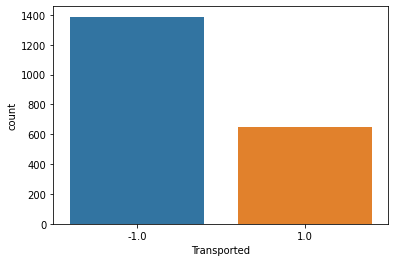

In [80]:
sb.countplot(dz["Transported"])

test size:  611 , total errors in test: 27.33%
index = predicted, columns = factual, in %:
           -1          1
-1  52.536825  13.584288
 1  13.747954  20.130933


c:\GitHub\spaceship\ds.py:243: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
c:\GitHub\spaceship\ds.py:290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


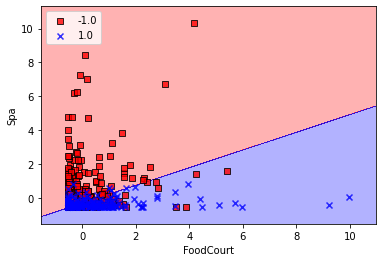

In [97]:
ppn_test = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'Perceptron', random_state_sample = 2,random_state_ppn = 1, fraction = 0.7, eta = 0.0001, iter = 300,plot = True, res =0.01)

In [84]:
ppn_test.w_

array([-0.00015655,  0.00029362, -0.00056401])

test size:  611 , total errors in test: 28.64%
index = predicted, columns = factual, in %:
           -1          1
-1  63.666121  26.022913
 1   2.618658   7.692308


c:\GitHub\spaceship\ds.py:243: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
c:\GitHub\spaceship\ds.py:290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


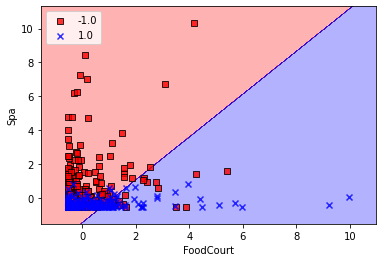

In [98]:
ppn_test = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'Adaline', random_state_sample = 2,random_state_ppn = 2, fraction = 0.7, eta = 0.0001, iter = 150,plot = True, res = 0.01)

In [67]:
ppn_test.w_

array([-0.416406  ,  0.33295764, -0.56770832])

test size:  552 , total errors in test: 23.19%
index = predicted, columns = factual, in %:
           -1          1
-1  71.376812  20.108696
 1    3.07971   5.434783


c:\GitHub\spaceship\ds.py:243: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
c:\GitHub\spaceship\ds.py:290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


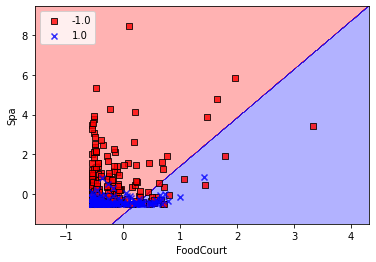

In [103]:
prediction = ppn_test.predict(dz[col_s])

d_tmp = dz[prediction == -1.0]

ppn_test_1= ds.divide_frame(dataf = d_tmp,columns = col_s,teacher_column = "Transported",classifier = 'Perceptron', random_state_sample = 3, random_state_ppn = 2, fraction = 0.7, eta = 0.0001, iter = 150,plot = True, res = 0.01)

(185, 3)


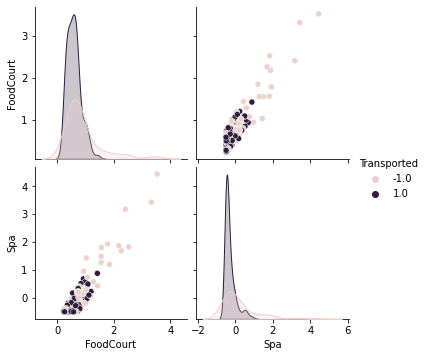

In [104]:
prediction = ppn_test_1.predict(d_tmp[col_s])

d_tmp = d_tmp[prediction == 1.0]

print(d_tmp.shape)

sb.pairplot(d_tmp,hue = "Transported")

#ppn_test_2= ds.divide_frame(dataf = d_tmp,columns = col_s,teacher_column = "Transported",classifier = 'Adaline', random_state_sample = 3, random_state_ppn = 2, fraction = 0.7, eta = 0.0001, iter = 150,plot = True, res = 0.01)

In [64]:
dr = dtmp[(dtmp["Side"]==1.0)&(dtmp["CryoSleep"]==0.0)]
dr.drop(['VIP','Side','CryoSleep'],axis = 1, inplace = True)
dr.shape

C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\2225162822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr.drop(['VIP','Side','CryoSleep'],axis = 1, inplace = True)


(2734, 10)

In [65]:
count_undef(dr)

Age: total undefined values: 43
RoomService: total undefined values: 65
FoodCourt: total undefined values: 54
ShoppingMall: total undefined values: 61
Spa: total undefined values: 56
VRDeck: total undefined values: 56
Deck: total undefined values: 0
Num: total undefined values: 0
route: total undefined values: 0
Total not fully defined records: 325


In [66]:
dr = dr[(dr['FoodCourt']>=0)&(dr['Spa']>=0)&(dr['Age']>=0)&(dr['RoomService']>=0)&(dr['VRDeck']>=0)&(dr['ShoppingMall']>=0)]
dr.shape

(2409, 10)

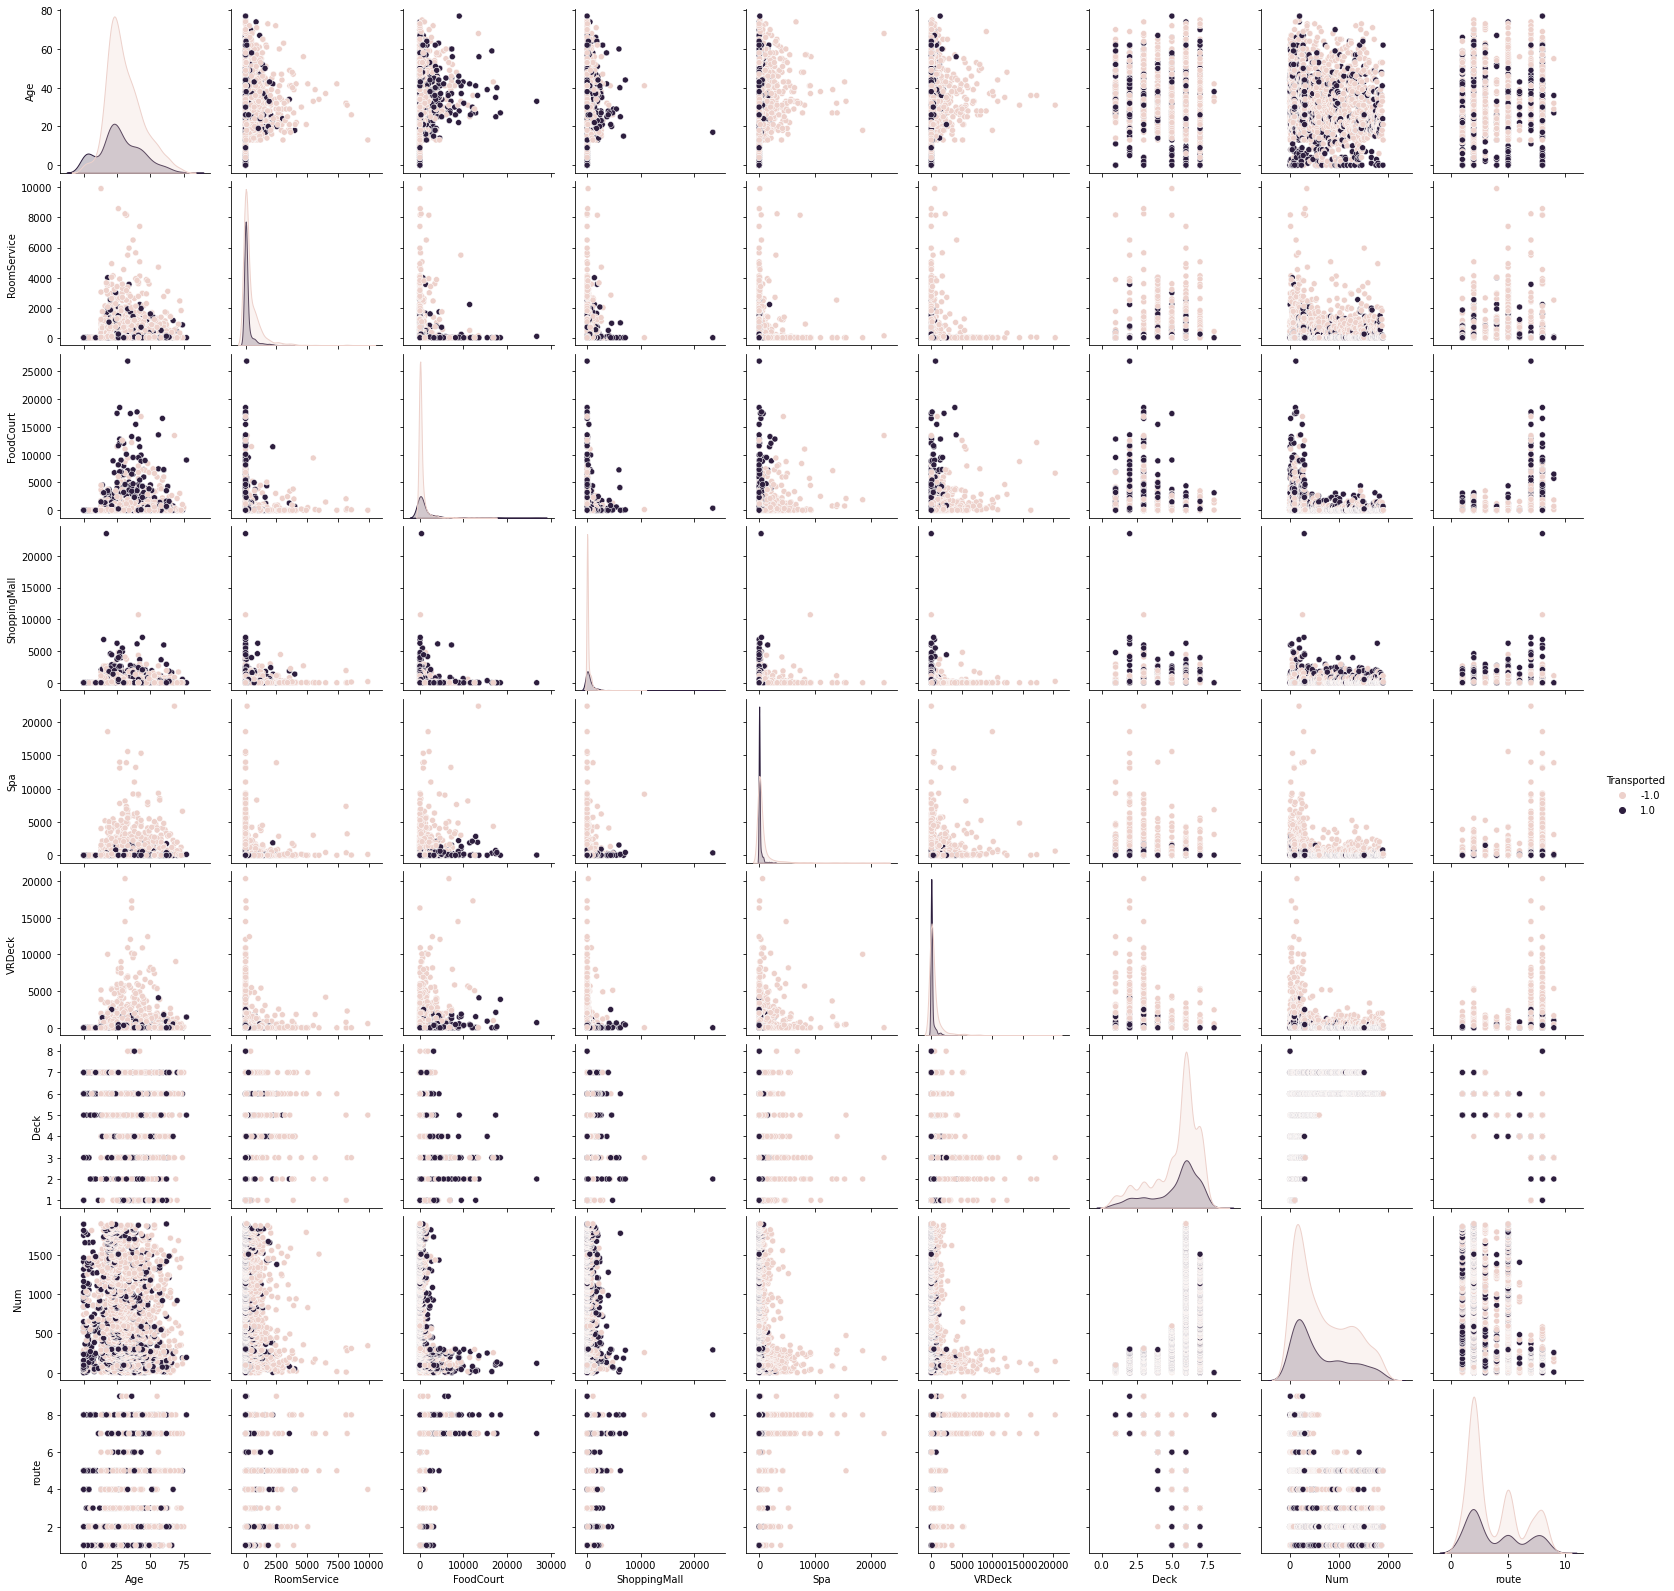

In [67]:

sb.pairplot(dr, hue = "Transported")


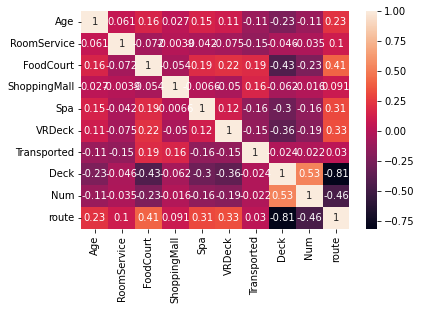

In [68]:
corrMatrix = dr.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

1) "VIP"==0.0 "Side"==1.0 "CryoSleep"==0.0 ==> FoodCourt + Spa + RoomService + VRDeck ==> Transported/Not

In [69]:
dr_=dr[(dr["FoodCourt"]>1)|(dr["Spa"]>1)|(dr["RoomService"]>1)|(dr["VRDeck"]>1)]
dr_.shape

(2156, 10)

In [70]:
cols = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]

for col in cols:
    m = dr_[col].median()
    for i in dr_.index:
        dr_.loc[i,col] /= m


C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\1081897446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_.loc[i,col] /= m
C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\1081897446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_.loc[i,col] /= m
C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\1081897446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_.loc[i,col] /= m
C:\Users\Папа\AppData\Local\Temp\ipykernel_

In [87]:

ppn1 = ds.divide_frame(dataf = dr_,columns = cols,teacher_column = "Transported",random_state_sample = 1,random_state_ppn = 4, fraction = 0.7, eta = 0.01, iter = 500,plot = False, res = 0.1)

647  total in test, errors: 18.55%


In [80]:
ppn1.w_

array([-39.84375655,   2.13673958,  -7.26645819,  -1.81406302,
         0.45532074,  -7.70781539])

In [92]:
col_s = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]
dz=dr[(dr["FoodCourt"]>1)|(dr["Spa"]>1)|(dr["RoomService"]>1)|(dr["VRDeck"]>1)]
print(dz.shape)

FoodCourt_mean = dz["FoodCourt"].median()
FoodCourt_sigma = dz["FoodCourt"].std()

Spa_mean = dz["Spa"].median()
Spa_sigma = dz["Spa"].std()

RoomService_mean = dz["RoomService"].median()
RoomService_sigma = dz["RoomService"].std()

ShoppingMall_mean = dz["ShoppingMall"].median()
ShoppingMall_sigma = dz["ShoppingMall"].std()

VRDeck_mean = dz["VRDeck"].median()
VRDeck_sigma = dz["VRDeck"].std()

for i in dz.index:
    dz.loc[i,"FoodCourt"] = (dz.loc[i,"FoodCourt"] - FoodCourt_mean)/FoodCourt_sigma
    dz.loc[i,"Spa"] = (dz.loc[i,"Spa"] - Spa_mean)/Spa_sigma
    dz.loc[i,"RoomService"] = (dz.loc[i,"RoomService"] - RoomService_mean)/RoomService_sigma
    dz.loc[i,"ShoppingMall"] = (dz.loc[i,"ShoppingMall"] - ShoppingMall_mean)/ShoppingMall_sigma
    dz.loc[i,"VRDeck"] = (dz.loc[i,"VRDeck"] - VRDeck_mean)/VRDeck_sigma

(2156, 10)


C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\921061811.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz.loc[i,"FoodCourt"] = (dz.loc[i,"FoodCourt"] - FoodCourt_mean)/FoodCourt_sigma
C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\921061811.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz.loc[i,"Spa"] = (dz.loc[i,"Spa"] - Spa_mean)/Spa_sigma
C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\921061811.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [98]:
ppn_test = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'Adaline', random_state_sample = 1,random_state_ppn = 1, fraction = 0.7, eta = 0.0001, iter = 50,plot = False, res = 0.1)

647  total in test, errors: 20.40%


In [91]:
ppn_test.w_

array([-4.83126716,  1.0618764 , -1.02741614, -0.6744533 ,  1.00050092,
       -1.04522725])

In [69]:
error = ppn1.predict(dr_.loc[:,cols])!=dr_.loc[:,"Transported"]
error.sum()/len(error)

0.17439703153988867

In [70]:
dr_=dr[(dr["FoodCourt"]<=1)&(dr["Spa"]<=1)&(dr["RoomService"]<=1)&(dr["VRDeck"]<=1)]
dr_.shape

(253, 10)

<AxesSubplot:>

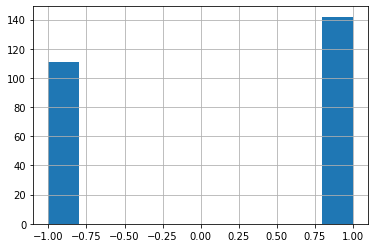

In [71]:
dr_["Transported"].hist()

#let's decide it is all Transported

In [99]:
dr = dtmp[(dtmp["Side"]==2.0)&(dtmp["CryoSleep"]==0.0)]
dr.drop(['Side','CryoSleep'],axis = 1, inplace = True)
dr.shape

C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\2709288253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr.drop(['Side','CryoSleep'],axis = 1, inplace = True)


(2711, 11)

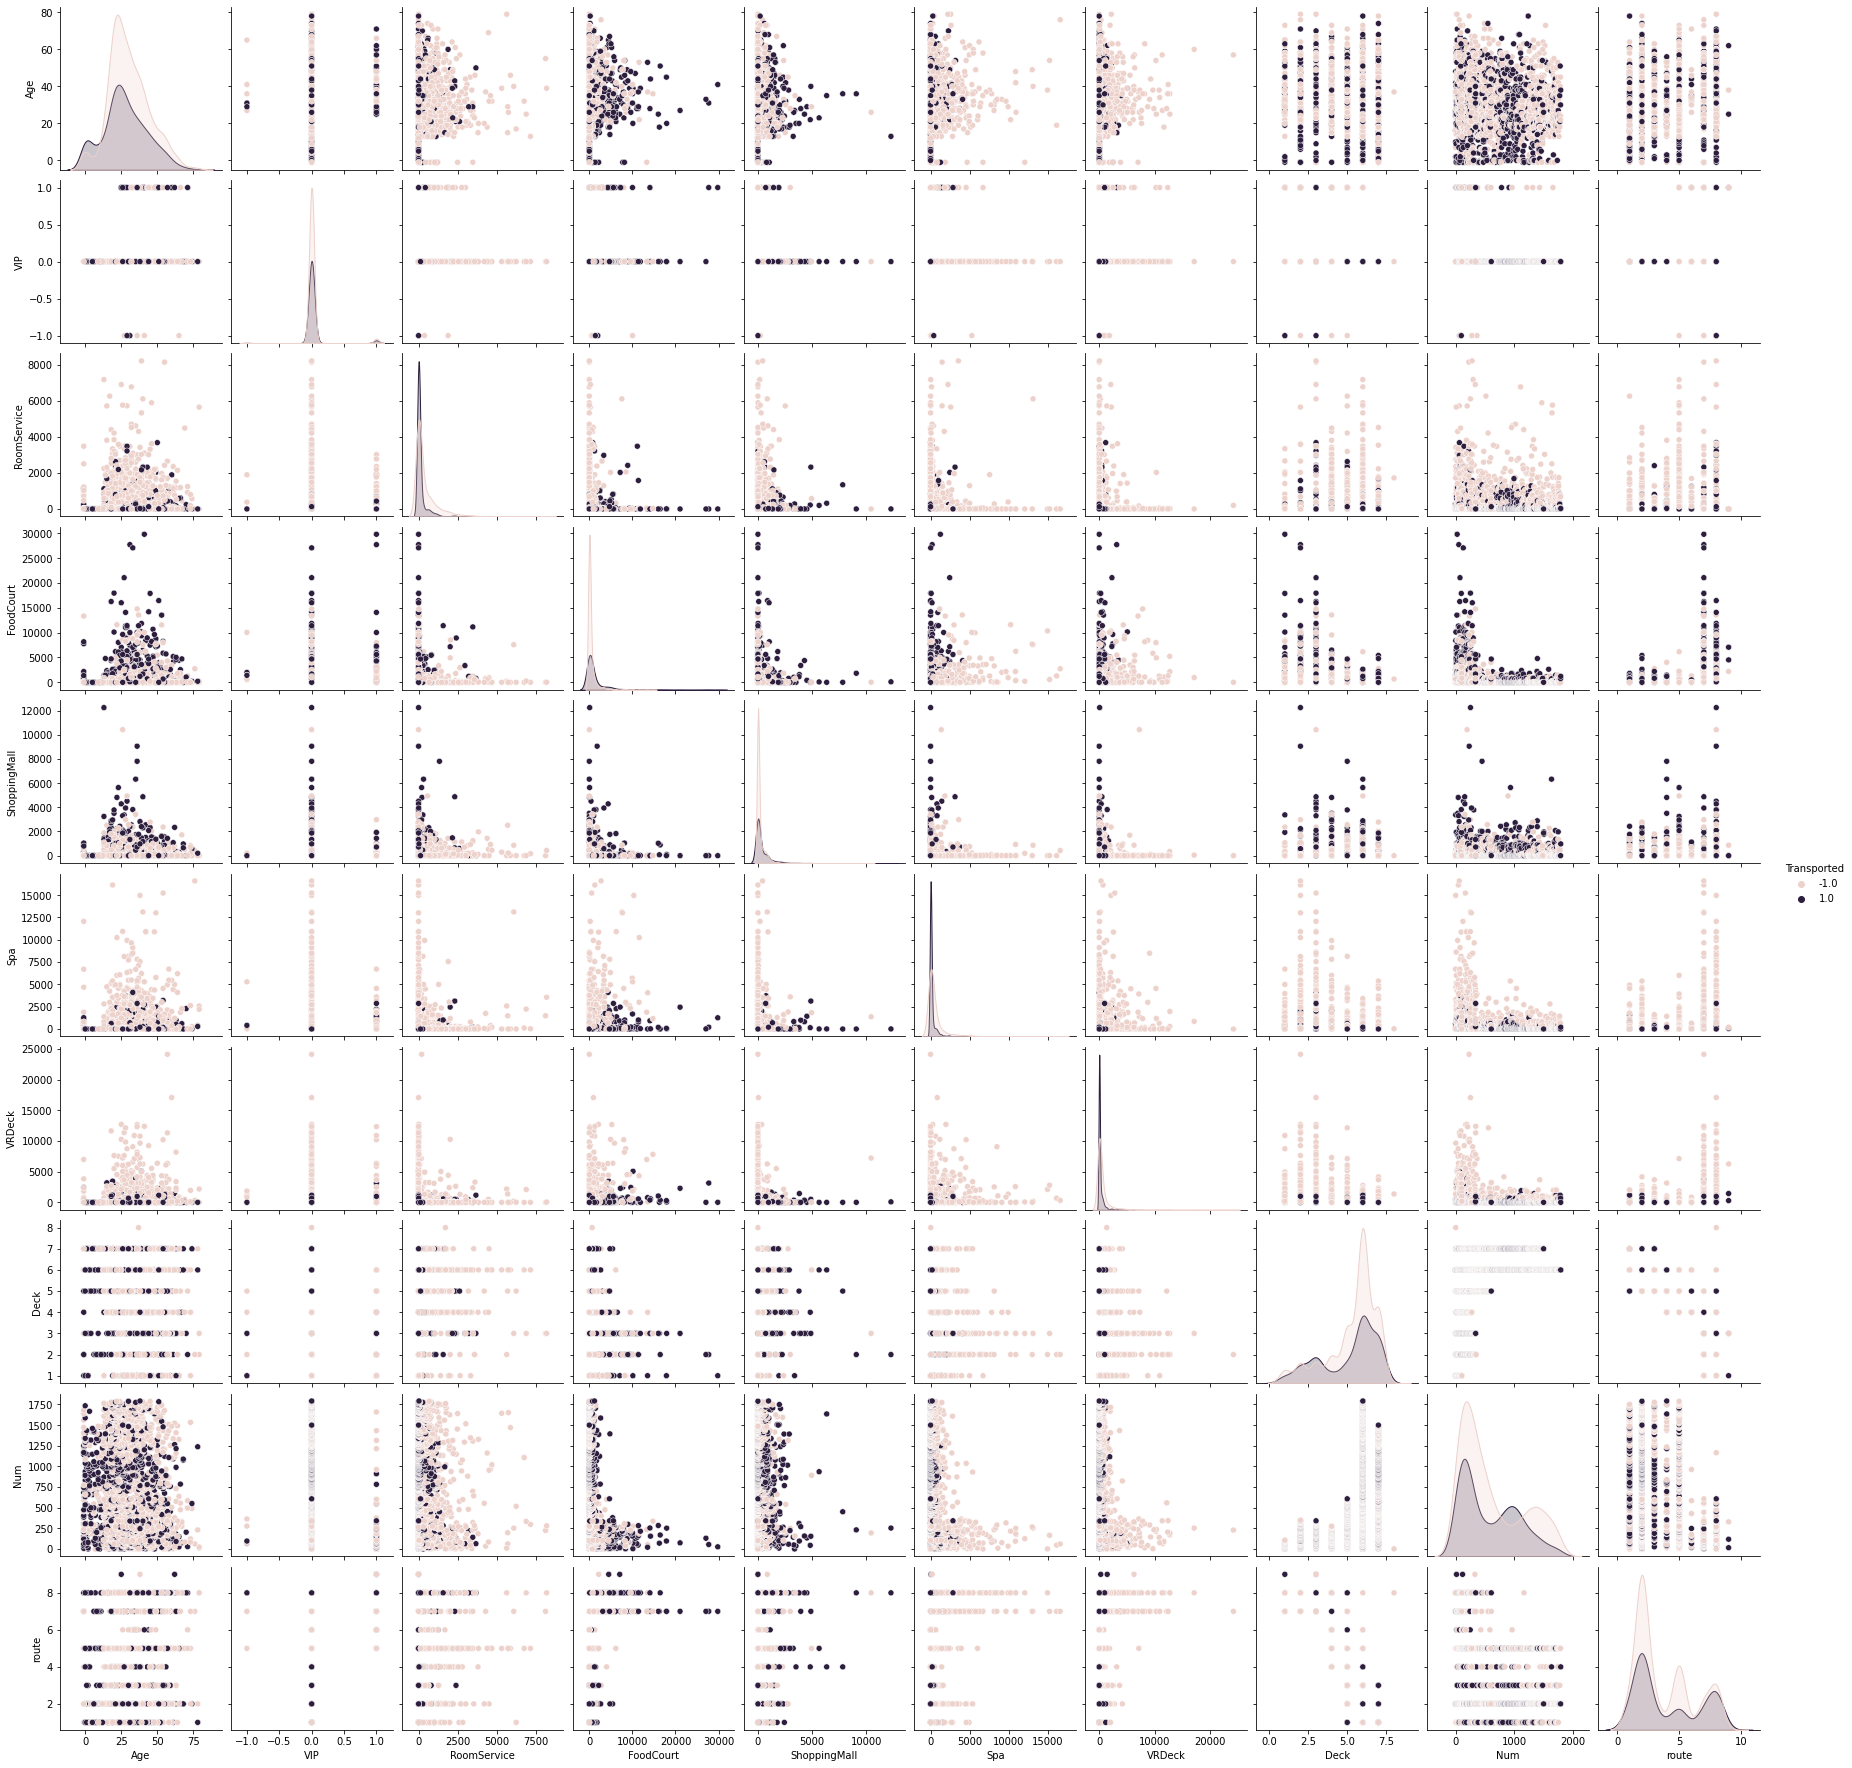

In [100]:
sb.pairplot(dr,hue = "Transported")

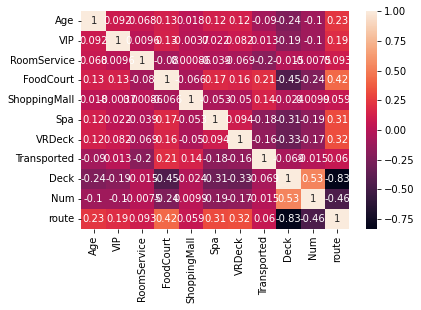

In [101]:
corrMatrix = dr.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

In [102]:
dr_=dr[(dr["FoodCourt"]>1)|(dr["Spa"]>1)|(dr["RoomService"]>1)|(dr["VRDeck"]>1)]
dr_.shape

(2409, 11)

In [103]:
cols = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]

for col in cols:
    m = dr_[col].median()
    for i in dr_.index:
        dr_.loc[i,col] /= m


C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\1081897446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_.loc[i,col] /= m
C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\1081897446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_.loc[i,col] /= m
C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\1081897446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_.loc[i,col] /= m
C:\Users\Папа\AppData\Local\Temp\ipykernel_

In [104]:
ppn2 = ds.divide_frame(dataf = dr_,columns = cols,teacher_column = "Transported",random_state_sample = 1,random_state_ppn =1, fraction = 0.7, eta = 0.01, iter = 500,plot = False, res = 0.1)

723  total in test, errors: 23.24%


In [105]:
error = ppn2.predict(dr_.loc[:,cols])!=dr_.loc[:,"Transported"]
error.sum()/len(error)

0.23619759236197593

In [106]:
col_s = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]
dz=dr[(dr["FoodCourt"]>1)|(dr["Spa"]>1)|(dr["RoomService"]>1)|(dr["VRDeck"]>1)]
print(dz.shape)

FoodCourt_mean = dz["FoodCourt"].median()
FoodCourt_sigma = dz["FoodCourt"].std()

Spa_mean = dz["Spa"].median()
Spa_sigma = dz["Spa"].std()

RoomService_mean = dz["RoomService"].median()
RoomService_sigma = dz["RoomService"].std()

ShoppingMall_mean = dz["ShoppingMall"].median()
ShoppingMall_sigma = dz["ShoppingMall"].std()

VRDeck_mean = dz["VRDeck"].median()
VRDeck_sigma = dz["VRDeck"].std()

for i in dz.index:
    dz.loc[i,"FoodCourt"] = (dz.loc[i,"FoodCourt"] - FoodCourt_mean)/FoodCourt_sigma
    dz.loc[i,"Spa"] = (dz.loc[i,"Spa"] - Spa_mean)/Spa_sigma
    dz.loc[i,"RoomService"] = (dz.loc[i,"RoomService"] - RoomService_mean)/RoomService_sigma
    dz.loc[i,"ShoppingMall"] = (dz.loc[i,"ShoppingMall"] - ShoppingMall_mean)/ShoppingMall_sigma
    dz.loc[i,"VRDeck"] = (dz.loc[i,"VRDeck"] - VRDeck_mean)/VRDeck_sigma

(2409, 11)


C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\921061811.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz.loc[i,"FoodCourt"] = (dz.loc[i,"FoodCourt"] - FoodCourt_mean)/FoodCourt_sigma
C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\921061811.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz.loc[i,"Spa"] = (dz.loc[i,"Spa"] - Spa_mean)/Spa_sigma
C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\921061811.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [114]:
ppn2_test = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = "Adaline",random_state_sample = 1,random_state_ppn =1, fraction = 0.7, eta = 0.00001, iter = 500,plot = False, res = 0.1)

723  total in test, errors: 27.94%


In [115]:
ppn2_test.w_

array([-0.2804032 ,  0.2770763 , -0.19398925, -0.16336882,  0.1391557 ,
       -0.16503556])

In [117]:
arr = (dr_["Num"]>750) & (dr_["Num"]<1250)
dr_["newNum"] = np.where(arr,1.0,0.0)


C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\2739002507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_["newNum"] = np.where(arr,1.0,0.0)


c:\Users\Папа\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newNum', ylabel='count'>

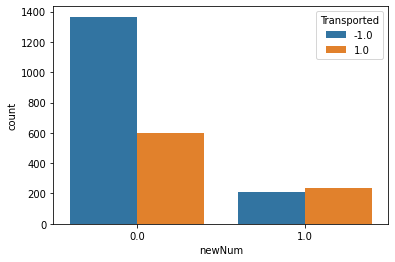

In [118]:
sb.countplot(dr_["newNum"], hue = dr_["Transported"])

In [119]:
ppn2 = ds.divide_frame(dataf = dr_,columns = cols+["newNum"],teacher_column = "Transported",random_state_sample = 1,random_state_ppn =1, fraction = 0.7, eta = 0.01, iter = 500,plot = False, res = 0.1)

723  total in test, errors: 23.10%


In [120]:
error = ppn2.predict(dr_.loc[:,cols+["newNum"]])!=dr_.loc[:,"Transported"]
error.sum()/len(error)

0.22955583229555832

In [121]:
col_s = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]
dz=dr[(dr["FoodCourt"]>1)|(dr["Spa"]>1)|(dr["RoomService"]>1)|(dr["VRDeck"]>1)]

arr = (dz["Num"]>750) & (dz["Num"]<1250)
dz["newNum"] = np.where(arr,1.0,0.0)
print(dz.shape)

FoodCourt_mean = dz["FoodCourt"].median()
FoodCourt_sigma = dz["FoodCourt"].std()

Spa_mean = dz["Spa"].median()
Spa_sigma = dz["Spa"].std()

RoomService_mean = dz["RoomService"].median()
RoomService_sigma = dz["RoomService"].std()

ShoppingMall_mean = dz["ShoppingMall"].median()
ShoppingMall_sigma = dz["ShoppingMall"].std()

VRDeck_mean = dz["VRDeck"].median()
VRDeck_sigma = dz["VRDeck"].std()

for i in dz.index:
    dz.loc[i,"FoodCourt"] = (dz.loc[i,"FoodCourt"] - FoodCourt_mean)/FoodCourt_sigma
    dz.loc[i,"Spa"] = (dz.loc[i,"Spa"] - Spa_mean)/Spa_sigma
    dz.loc[i,"RoomService"] = (dz.loc[i,"RoomService"] - RoomService_mean)/RoomService_sigma
    dz.loc[i,"ShoppingMall"] = (dz.loc[i,"ShoppingMall"] - ShoppingMall_mean)/ShoppingMall_sigma
    dz.loc[i,"VRDeck"] = (dz.loc[i,"VRDeck"] - VRDeck_mean)/VRDeck_sigma

C:\Users\Папа\AppData\Local\Temp\ipykernel_37976\534334134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz["newNum"] = np.where(arr,1.0,0.0)


(2409, 12)


In [122]:
ppn2_test = ds.divide_frame(dataf = dz,columns = col_s+["newNum"],teacher_column = "Transported",random_state_sample = 1,random_state_ppn =1, fraction = 0.7, eta = 0.01, iter = 500,plot = False, res = 0.1)

723  total in test, errors: 26.83%


In [123]:
ppn2_test.w_

array([-0.00375655,  0.06307884, -0.09613315, -0.01595522,  0.05270761,
       -0.04831868, -0.00255188])

In [83]:
dr_=dr[(dr["FoodCourt"]<=1)&(dr["Spa"]<=1)&(dr["RoomService"]<=1)&(dr["VRDeck"]<=1)]
dr_.shape

(302, 11)

In [84]:
dr_.value_counts("Transported")

Transported
 1.0    204
-1.0     98
dtype: int64

In [85]:
dr = dtmp[(dtmp["VIP"]==0.0)&(dtmp["Side"]==1.0)&(dtmp["CryoSleep"]==1.0)]
dr.drop(['VIP','Side','CryoSleep','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis = 1, inplace = True)
dr.shape

C:\Users\Папа\AppData\Local\Temp\ipykernel_36788\2685694020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr.drop(['VIP','Side','CryoSleep','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis = 1, inplace = True)


(1408, 5)

c:\Users\Папа\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

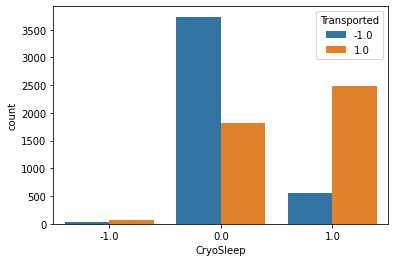

In [86]:
sb.countplot(da["CryoSleep"], hue = da["Transported"])

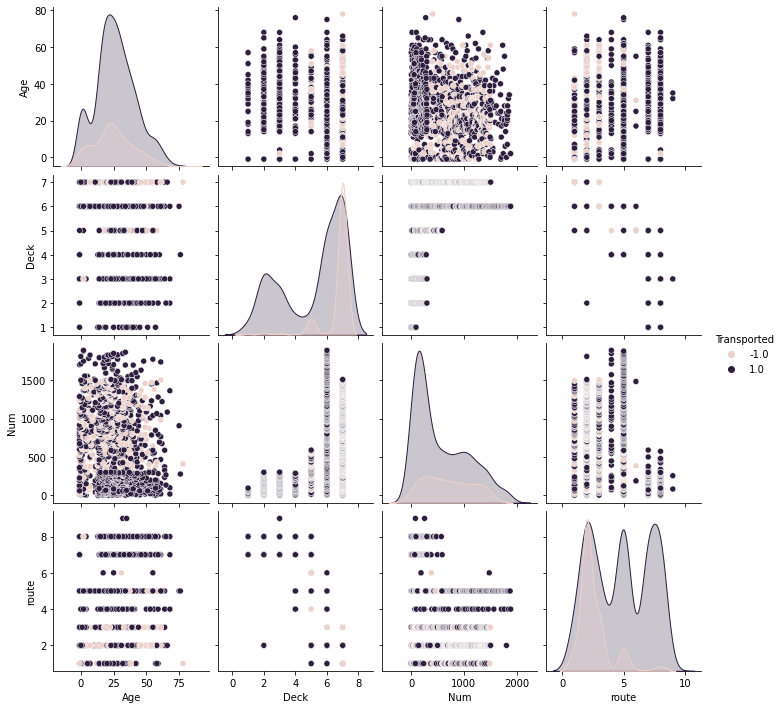

In [87]:
sb.pairplot(dr,hue = "Transported")

In [88]:
dr_=dr
arr = dr_["Num"]<1000
dr_["newNum"] = np.where(arr,1.0,0.0)

C:\Users\Папа\AppData\Local\Temp\ipykernel_36788\4294736732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_["newNum"] = np.where(arr,1.0,0.0)


In [89]:
arr = dr_["Age"]>10
dr_["newAge"] = np.where(arr,1.0,0.0)

C:\Users\Папа\AppData\Local\Temp\ipykernel_36788\2865212544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_["newAge"] = np.where(arr,1.0,0.0)


In [90]:
cols = ["Deck","route"]

for col in cols:
    m = dr_[col].median()
    for i in dr_.index:
        dr_.loc[i,col] /= m
cols.append("newNum")
cols.append("newAge")

In [91]:
ppn3 = ds.divide_frame(dataf = dr_,columns = cols,teacher_column = "Transported",random_state_sample = 1,random_state_ppn =1, fraction = 0.7, eta = 0.01, iter = 500,plot = False, res = 0.1)

422  total in test, errors: 22.75%


In [92]:
error = ppn3.predict(dr_.loc[:,cols])!=dr_.loc[:,"Transported"]
error.sum()/len(error)

0.22301136363636365

5) "VIP"==0.0 "Side"==1.0 "CryoSleep"==1.0  ==> Deck + route ==> Transported/Not

In [93]:
dr = dtmp[(dtmp["VIP"]==1.0)&(dtmp["Side"]==1.0)&(dtmp["CryoSleep"]==1.0)]
dr.drop(['VIP','Side','CryoSleep','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis = 1, inplace = True)
dr.shape

C:\Users\Папа\AppData\Local\Temp\ipykernel_36788\2142280599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr.drop(['VIP','Side','CryoSleep','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis = 1, inplace = True)


(9, 5)

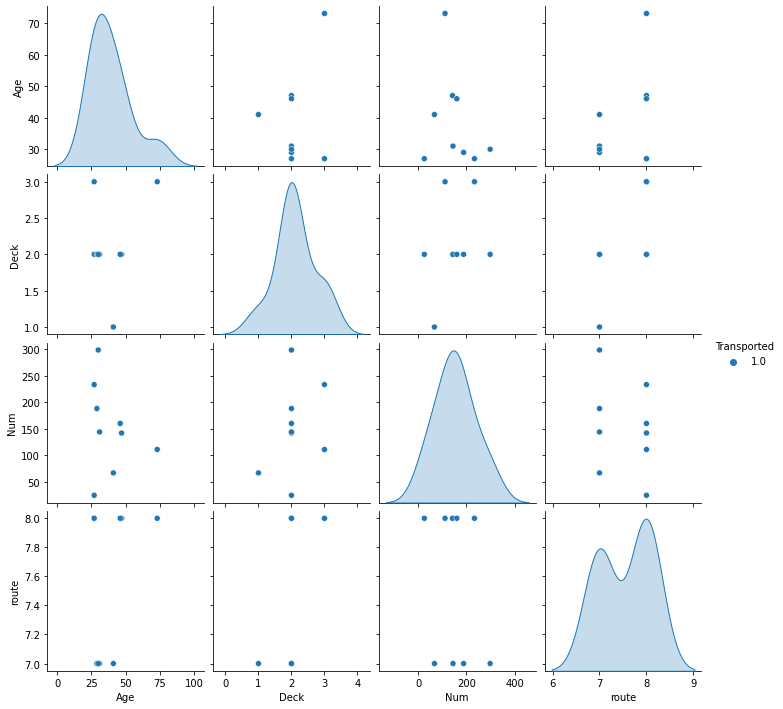

In [94]:
sb.pairplot(dr,hue = "Transported")

6) "VIP"==1.0 "Side"==1.0 "CryoSleep"==1.0  ==> Transported

In [95]:
dr = dtmp[(dtmp["VIP"]==0.0)&(dtmp["Side"]==2.0)&(dtmp["CryoSleep"]==1.0)]
dr.drop(['VIP','Side','CryoSleep','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis = 1, inplace = True)
dr.shape

C:\Users\Папа\AppData\Local\Temp\ipykernel_36788\3640146531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr.drop(['VIP','Side','CryoSleep','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis = 1, inplace = True)


(1518, 5)

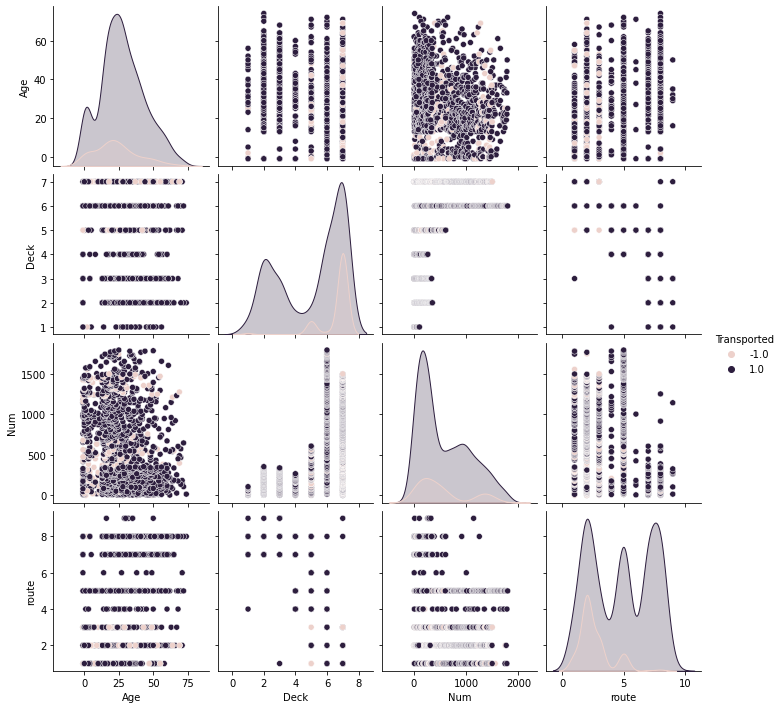

In [96]:
sb.pairplot(dr,hue = "Transported")

c:\Users\Папа\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='route', ylabel='count'>

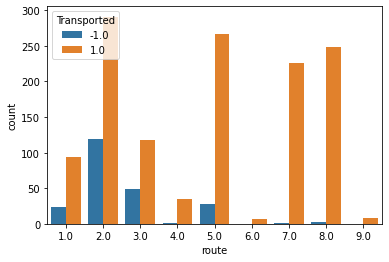

In [97]:
sb.countplot(dr["route"], hue = dr["Transported"])

c:\Users\Папа\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Deck', ylabel='count'>

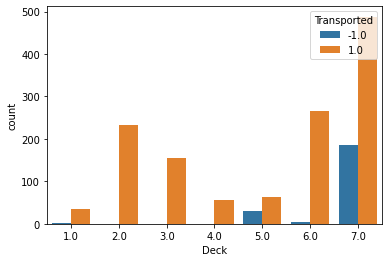

In [98]:
sb.countplot(dr["Deck"], hue = dr["Transported"])

In [99]:
Deck_set = {1.0, 2.0, 3.0, 4.0, 6.0}
route_set = {4.0, 6.0, 7.0, 8.0, 9.0}

deck_arr = (dr["Deck"] == 1.0)|(dr["Deck"] == 2.0)|(dr["Deck"] == 3.0)|(dr["Deck"] == 4.0)|(dr["Deck"] == 6.0)
route_arr = (dr["route"] == 4.0)|(dr["route"] == 6.0)|(dr["route"] == 7.0)|(dr["route"] == 8.0)|(dr["route"] == 9.0)

dr_ = dr[~(deck_arr | route_arr)]

arr = (dr_["Num"]>700) & (dr_["Num"]<1300)
dr_["newNum"] = np.where(arr,1.0,0.0)

dr_ = dr_[dr_["newNum"] ==0.0] 
dr_.shape

C:\Users\Папа\AppData\Local\Temp\ipykernel_36788\1975228758.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_["newNum"] = np.where(arr,1.0,0.0)


(471, 6)

In [100]:
pd.value_counts(dr_["Transported"])

 1.0    278
-1.0    193
Name: Transported, dtype: int64

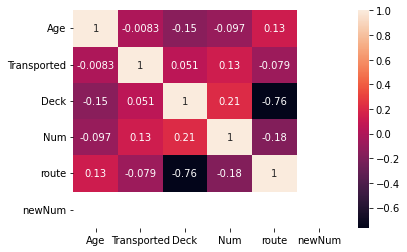

In [101]:
corrMatrix = dr_.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

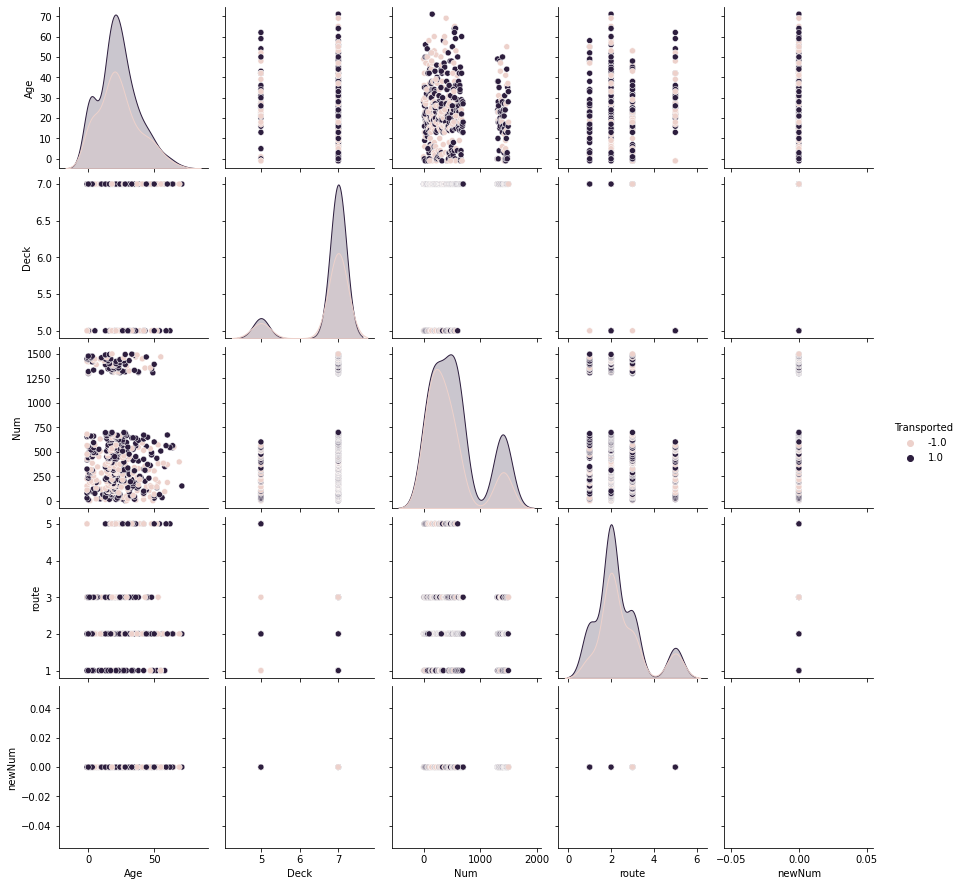

In [102]:
sb.pairplot(dr_,hue = "Transported")

c:\Users\Папа\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='route', ylabel='count'>

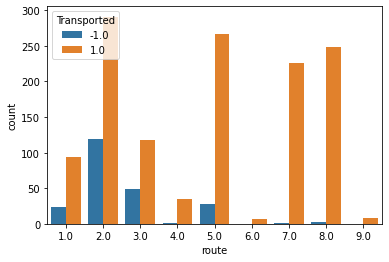

In [103]:
sb.countplot(dr["route"], hue = dr["Transported"])

7) "VIP"==0.0 "Side"==2.0 "CryoSleep"==1.0  ==> (Deck , route) 4 pairs ==> Transported/Not

In [104]:
dr = dtmp[(dtmp["VIP"]==1.0)&(dtmp["Side"]==2.0)&(dtmp["CryoSleep"]==1.0)]
dr.drop(['VIP','Side','CryoSleep','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis = 1, inplace = True)
dr.shape

C:\Users\Папа\AppData\Local\Temp\ipykernel_36788\3312682995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr.drop(['VIP','Side','CryoSleep','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis = 1, inplace = True)


(12, 5)

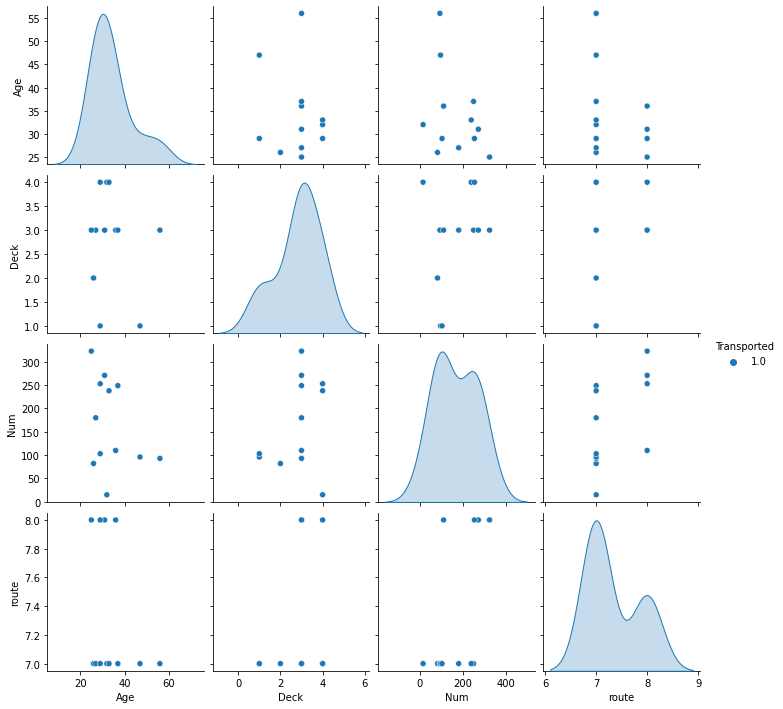

In [105]:
sb.pairplot(dr,hue = "Transported")

8) "VIP"==1.0 "Side"==2.0 "CryoSleep"==1.0  ==> Transported

In [106]:
def model(df):
        d = df[(df["Side"]==1.0)&(df["CryoSleep"]==0.0)]
        d1 = d[(d["FoodCourt"]>1)|(d["Spa"]>1)|(d["RoomService"]>1)|(d["VRDeck"]>1)]
        cols = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]

        for col in cols:
                m = d1[col].median()
                for i in d1.index:
                        d1.loc[i,col] /= m
                
        d1["prediction"] = ppn1.predict(d1.loc[:,cols])
        
        d1_rest = d[(d["FoodCourt"]<=1)&(d["Spa"]<=1)&(d["RoomService"]<=1)&(d["VRDeck"]<=1)]
        d1_rest["prediction"] = 1.0
        d = df[(df["Side"]==2.0)&(df["CryoSleep"]==0.0)]
        d2 = d[(d["FoodCourt"]>1)|(d["Spa"]>1)|(d["RoomService"]>1)|(d["VRDeck"]>1)]
        cols = ["FoodCourt","Spa","RoomService","ShoppingMall","VRDeck"]

        for col in cols:
                m = d2[col].median()
                for i in d2.index:
                        d2.loc[i,col] /= m
                
        cols.append("newNum")
        
        arr = (d2["Num"]>750) & (d2["Num"]<1250)
        d2["newNum"] = np.where(arr,1.0,0.0)
            
        d2["prediction"] = ppn2.predict(d2.loc[:,cols])
        d2_rest =  d[(d["FoodCourt"]<=1)&(d["Spa"]<=1)&(d["RoomService"]<=1)&(d["VRDeck"]<=1)]
        d2_rest["prediction"] = 1.0
        
        d3 = df[(df["VIP"]==0.0)&(df["Side"]==1.0)&(df["CryoSleep"]==1.0)]
        arr = d3["Num"]<1000
        d3["newNum"] = np.where(arr,1.0,0.0)
        arr = d3["Age"]>10
        d3["newAge"] = np.where(arr,1.0,0.0)
        
        cols = ["Deck","route"]

        for col in cols:
                m = d3[col].median()
                for i in d3.index:
                        d3.loc[i,col] /= m
        print("3.8")
        cols.append("newNum")
        cols.append("newAge")
          
        d3["prediction"] = ppn3.predict(d3.loc[:,cols])
        
        d4 = df[(df["VIP"]==0.0)&(df["Side"]==2.0)&(df["CryoSleep"]==1.0)]

        deck_arr = (df["Deck"] == 1.0)|(df["Deck"] == 2.0)|(df["Deck"] == 3.0)|(df["Deck"] == 4.0)|(df["Deck"] == 6.0)
        route_arr = (df["route"] == 4.0)|(df["route"] == 6.0)|(df["route"] == 7.0)|(df["route"] == 8.0)|(df["route"] == 9.0)
        print("5")

        d4_1 = d4[deck_arr | route_arr]
        d4_1["prediction"] = 1.0
        
        d4_2 = d4[~(deck_arr | route_arr)]
        d4_2["prediction"] = 1.0 #(471)

        arr = (dr_["Num"]>700) & (dr_["Num"]<1300)
        dr_["newNum"] = np.where(arr,1.0,0.0)
        
        d5 = df[(df["VIP"]==1.0)&(df["CryoSleep"]==1.0)]
        d5["prediction"] = 1.0
          
        result = d1.append(d1_rest).append(d2).append(d2_rest).append(d3).append(d4_1).append(d4_2).append(d5)
        
        return result
        
        
        

In [107]:
def clean(df):
    for j in df.columns:
        for i in df.index:
            if df.loc[i,j] == -1.0:
                df.loc[i,j] = 0.0
    return df

In [108]:
dtmp.head(10)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,route
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,1.0,8.0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,6.0,0.0,2.0,2.0
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,1.0,0.0,2.0,8.0
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,1.0,0.0,2.0,8.0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,6.0,1.0,2.0,2.0
5,0.0,44.0,0.0,0.0,483.0,0.0,291.0,0.0,1.0,6.0,0.0,1.0,3.0
6,0.0,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,1.0,6.0,2.0,2.0,2.0
7,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,2.0,2.0
8,0.0,35.0,0.0,0.0,785.0,17.0,216.0,0.0,1.0,6.0,3.0,2.0,2.0
9,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,7.0


In [109]:
result = clean(dtmp)

result = model(result)

result.shape

error = result["prediction"]!=dtmp["Transported"]
error.sum()/len(error)

1


C:\Users\Папа\AppData\Local\Temp\ipykernel_36788\3695354872.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.loc[i,col] /= m
C:\Users\Папа\AppData\Local\Temp\ipykernel_36788\3695354872.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.loc[i,col] /= m
C:\Users\Папа\AppData\Local\Temp\ipykernel_36788\3695354872.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.loc[i,col] /= m
C:\Users\Папа\AppData\Local\Temp\ipykernel_

2
3


C:\Users\Папа\AppData\Local\Temp\ipykernel_36788\3695354872.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2.loc[i,col] /= m
C:\Users\Папа\AppData\Local\Temp\ipykernel_36788\3695354872.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2.loc[i,col] /= m
C:\Users\Папа\AppData\Local\Temp\ipykernel_36788\3695354872.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2.loc[i,col] /= m
C:\Users\Папа\AppData\Local\Temp\ipykernel_

3.5
3.6
3.7
3.8
4
5
6
7


ValueError: Can only compare identically-labeled Series objects

In [ ]:
dtmp.shape

(8693, 13)

In [ ]:
result.shape

(8494, 16)